In [5]:
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,GlobalAveragePooling2D,BatchNormalization,Activation,Dropout
from keras.applications.vgg16 import VGG16

In [2]:
def plot_training(history):
    """Simple plot function"""
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title('Loss')
    plt.legend()

    plt.show()


In [3]:
def train_dataset(config=None):
  CLASS_NAMES = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]
  IMG_CHANNELS = 3

  def read_and_decode(filename, resize_dims):
    img_bytes = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img_bytes, channels=IMG_CHANNELS)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, resize_dims)
    return img

  def parse_csvline(csv_line):
    record_default = ["", ""]
    filename, label_string = tf.io.decode_csv(csv_line, record_default)
    img = read_and_decode(filename, [128, 128])
    label = tf.argmax(tf.equal(CLASS_NAMES, label_string))
    return img, label

  train_dataset = (
      tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv")
      .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
      .batch(32)
      .prefetch(tf.data.AUTOTUNE))

  eval_dataset = (
      tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv")
      .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
      .batch(32)
      .prefetch(tf.data.AUTOTUNE)
      )
  base_model=VGG16(
      weights="imagenet",
      include_top=False,
      input_shape=(128,128,3)
  )
  base_model.trainable=False

  model=Sequential([
      base_model,
      GlobalAveragePooling2D(),

      #Layer 1:
      Dense(256),
      BatchNormalization(),
      Activation("relu"),
      Dropout(0.5),

      #Layer 2:
      Dense(128),
      BatchNormalization(),
      Activation("relu"),
      Dropout(0.5),

      # Output Layer:
      Dense(len(CLASS_NAMES),activation="softmax")
  ])

  model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=["accuracy"])

  history=model.fit(train_dataset,validation_data=eval_dataset,epochs=5,verbose=1,      callbacks=[
      tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

  plot_training(history)
  return history, model



Epoch 1/5
    104/Unknown 78s 682ms/step - accuracy: 0.3967 - loss: 1.6110

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


104/104 ━━━━━━━━━━━━━━━━━━━━ 89s 786ms/step - accuracy: 0.3977 - loss: 1.6081 - val_accuracy: 0.6162 - val_loss: 1.1459
Epoch 2/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 137s 788ms/step - accuracy: 0.6533 - loss: 0.9254 - val_accuracy: 0.7297 - val_loss: 0.8621
Epoch 3/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 83s 794ms/step - accuracy: 0.7247 - loss: 0.7669 - val_accuracy: 0.7568 - val_loss: 0.7077
Epoch 4/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 96s 927ms/step - accuracy: 0.7471 - loss: 0.7086 - val_accuracy: 0.7676 - val_loss: 0.6412
Epoch 5/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 85s 814ms/step - accuracy: 0.7613 - loss: 0.6444 - val_accuracy: 0.7568 - val_loss: 0.6463


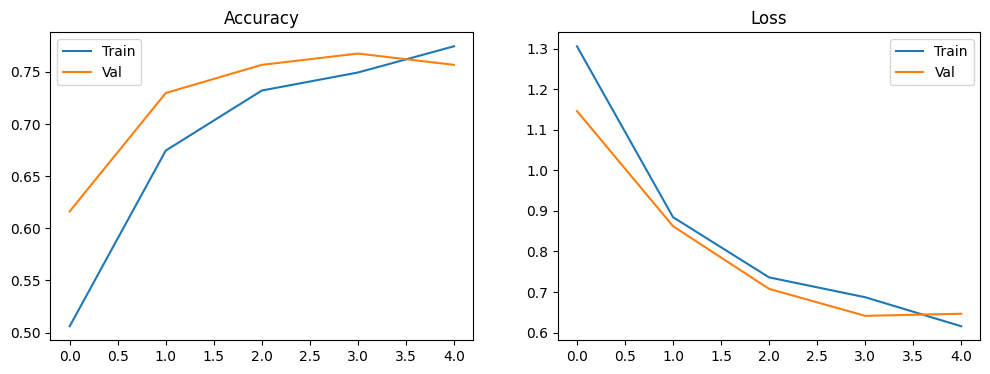

Training completed!
Final training accuracy: 0.7745
Final validation accuracy: 0.7568


In [8]:
def main():
    """Simple main function to run original code"""

    history, model = train_dataset()

    print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")

if __name__ == "__main__":
    main()

In [10]:
def train_dataset(config=None):
  CLASS_NAMES = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]
  IMG_CHANNELS = 3

  def read_and_decode(filename, resize_dims):
    img_bytes = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img_bytes, channels=IMG_CHANNELS)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, resize_dims)
    return img

  def parse_csvline(csv_line):
    record_default = ["", ""]
    filename, label_string = tf.io.decode_csv(csv_line, record_default)
    img = read_and_decode(filename, [128, 128])
    label = tf.argmax(tf.equal(CLASS_NAMES, label_string))
    return img, label

  train_dataset = (
      tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv")
      .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
      .batch(32)
      .prefetch(tf.data.AUTOTUNE))

  eval_dataset = (
      tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv")
      .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
      .batch(32)
      .prefetch(tf.data.AUTOTUNE)
      )
  base_model=VGG16(
      weights="imagenet",
      include_top=False,
      input_shape=(128,128,3)
  )
  base_model.trainable=False

  fine_tune_at = 15  # Unfreeze last 4 layers

  for layer in base_model.layers[:fine_tune_at]:
      layer.trainable = False
  for layer in base_model.layers[fine_tune_at:]:
      layer.trainable = True

  model=Sequential([
      base_model,
      GlobalAveragePooling2D(),

      #Layer 1:
      Dense(256),
      BatchNormalization(),
      Activation("relu"),
      Dropout(0.5),

      #Layer 2:
      Dense(128),
      BatchNormalization(),
      Activation("relu"),
      Dropout(0.5),

      # Output Layer:
      Dense(len(CLASS_NAMES),activation="softmax")
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=["accuracy"]
  )

  history=model.fit(train_dataset,validation_data=eval_dataset,epochs=5,verbose=1,callbacks=[
      tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

  plot_training(history)
  return history, model



Epoch 1/5
    104/Unknown 83s 717ms/step - accuracy: 0.4169 - loss: 1.5336

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


104/104 ━━━━━━━━━━━━━━━━━━━━ 95s 831ms/step - accuracy: 0.4180 - loss: 1.5307 - val_accuracy: 0.7162 - val_loss: 0.7527
Epoch 2/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 137s 835ms/step - accuracy: 0.6907 - loss: 0.8292 - val_accuracy: 0.7892 - val_loss: 0.5651
Epoch 3/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 86s 826ms/step - accuracy: 0.8023 - loss: 0.5896 - val_accuracy: 0.7973 - val_loss: 0.5529
Epoch 4/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 81s 780ms/step - accuracy: 0.8495 - loss: 0.4719 - val_accuracy: 0.8297 - val_loss: 0.5034
Epoch 5/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.8774 - loss: 0.3863 - val_accuracy: 0.8432 - val_loss: 0.4408


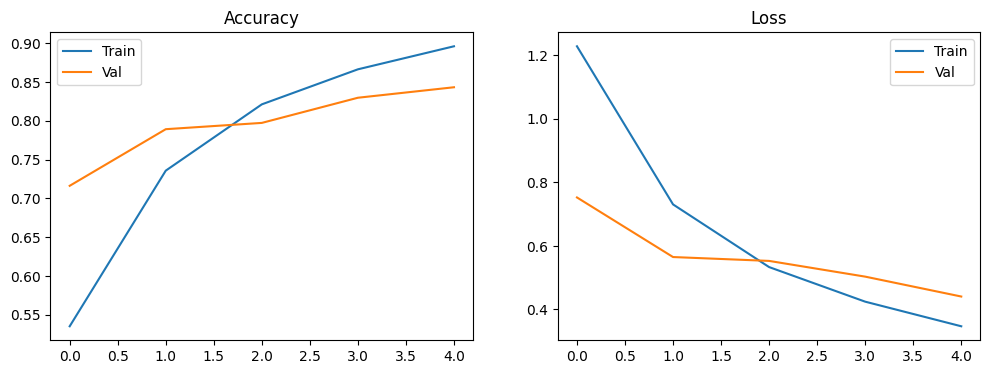

Training completed!
Final training accuracy: 0.8961
Final validation accuracy: 0.8432


In [11]:
def main():
    """Simple main function to run original code"""

    history, model = train_dataset()

    print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")

if __name__ == "__main__":
    main()